# Titanic Project

### Problem statement:- Build a classification model to predict if the given passenger will survive or not.¶


### Data Preprocessing¶


Importing the important libraries for data reading and cleaning.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Variable assign to the link of the data

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv'

Setting the option to check '200' rows for better visuliazation

In [4]:
pd.set_option('display.max_rows', 200)

Dataset:- We have 891 rows and 12 columns.

In [6]:
df=pd.read_csv(url)

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have null values in Age, cabin and Embarked category. We will have to treat them.


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We have Fare value of 0 which needs to be checked as how likely the fare will be 0.



Lets treat the null values in column Embarked with mode method

In [11]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

To replace the missing value in Age we will check how Age is distributed, so we can use mean or median method to replace the NaN values


<AxesSubplot:xlabel='Age', ylabel='Density'>

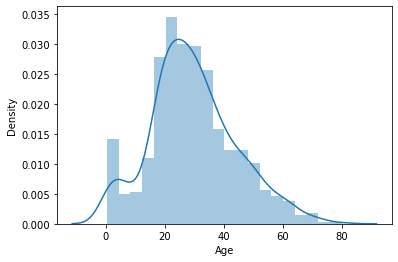

In [13]:
sns.distplot(df['Age'])

Age is close to normal distribution. Hence we will use the mean method to replace NaN values.

In [14]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

NaN value from Age has been removed. Now we will check the Cabin feature to treat the NaN values


In [16]:
df['Cabin'].value_counts()

C23 C25 C27        4
B96 B98            4
G6                 4
E101               3
F33                3
F2                 3
C22 C26            3
D                  3
E121               2
C65                2
C124               2
C123               2
D26                2
B35                2
E33                2
E24                2
B49                2
C93                2
B28                2
F4                 2
D17                2
F G73              2
C92                2
E8                 2
B22                2
C83                2
B5                 2
B58 B60            2
D33                2
C68                2
E25                2
B18                2
D36                2
C52                2
C126               2
E44                2
C78                2
B57 B59 B63 B66    2
C125               2
B20                2
B77                2
C2                 2
D35                2
B51 B53 B55        2
E67                2
D20                2
B71                1
B3           

Cabin has maximum Null values. It cannot be ignored as the location of the cabin may have been important for survival.

The Cabin in the dataset starts with alphabet and it ranges from A-F. So I will replace all the NaN values with G.



In [17]:
df['Cabin'] = df['Cabin'].fillna('G')

In [18]:
df['Cabin'].value_counts()

G                  687
B96 B98              4
G6                   4
C23 C25 C27          4
F2                   3
C22 C26              3
D                    3
E101                 3
F33                  3
D26                  2
B5                   2
C123                 2
E44                  2
B35                  2
E33                  2
B77                  2
E121                 2
B28                  2
D17                  2
B22                  2
C83                  2
B58 B60              2
E24                  2
B57 B59 B63 B66      2
E25                  2
E8                   2
C124                 2
F G73                2
D33                  2
B51 B53 B55          2
F4                   2
B49                  2
C92                  2
C93                  2
B20                  2
E67                  2
D36                  2
C52                  2
C126                 2
D20                  2
C125                 2
D35                  2
C2                   2
C78        

Now lets treat the 0 value in the Fare.

In [19]:
df[df["Fare"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,G,S
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,G,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0,G,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,G,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,0.0,G,S
466,467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,0.0,G,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,0.0,G,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,G,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0,G,S


We can see that Fare with the 0 values has Embarked from S and only Cabin A, B and G has the 0 value.

We will replace the same with mean of Cabin and Embarkation point.

In [20]:
df[(df["Cabin"] == 'A' )& (df['Embarked']=='S')].mean()

PassengerId   NaN
Survived      NaN
Pclass        NaN
Name          NaN
Sex           NaN
Age           NaN
SibSp         NaN
Parch         NaN
Ticket        NaN
Fare          NaN
Cabin         NaN
Embarked      NaN
dtype: float64

In [21]:
df.loc[(df["Cabin"] == 'A' )& (df['Fare']==0), 'Fare']=40.73

In [23]:
df[(df["Cabin"] == 'B' )& (df['Embarked']=='S')].mean()

PassengerId   NaN
Survived      NaN
Pclass        NaN
Name          NaN
Sex           NaN
Age           NaN
SibSp         NaN
Parch         NaN
Ticket        NaN
Fare          NaN
Cabin         NaN
Embarked      NaN
dtype: float64

In [24]:
df[(df["Cabin"] == 'G' )& (df['Embarked']=='S')].mean()

PassengerId    446.485437
Survived         0.266019
Pclass           2.625243
Age             28.316820
SibSp            0.603883
Parch            0.396117
Fare            18.003064
dtype: float64

In [25]:
df.loc[(df["Cabin"] == 'B' )& (df['Fare']==0), 'Fare']=84.94

In [26]:
df[df["Fare"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,G,S
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,G,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0,G,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,G,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,0.0,G,S
466,467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,0.0,G,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,0.0,G,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,G,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0,G,S


In [27]:
df.loc[(df["Cabin"] == 'G' )& (df['Fare']==0), 'Fare']=17.96

In [28]:
df[df["Fare"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.000000,0,0,112050,0.0,A36,S
815,816,0,1,"Fry, Mr. Richard",male,29.699118,0,0,112058,0.0,B102,S


Done!!! Now there is no 0 value Fare.

In [30]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.446093
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.579537
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,15.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Both Parch and SibSp are related to Family members travelling. Lets Join this group and create a new column as Family member



In [31]:
df['FamilySize'] = df.SibSp + df.Parch + 1

In [32]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,G,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,G,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,G,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,G,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,G,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1


In [33]:
df['Ticket'].value_counts()

1601                  7
347082                7
CA. 2343              7
347088                6
3101295               6
                     ..
3101296               1
29108                 1
17464                 1
A/5 2817              1
SOTON/O.Q. 3101307    1
Name: Ticket, Length: 681, dtype: int64

In [34]:
df.drop(['PassengerId','SibSp','Parch','Ticket','Name'],axis=1,inplace=True)

In [35]:
df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,0,3,male,22.000000,7.2500,G,S,2
1,1,1,female,38.000000,71.2833,C85,C,2
2,1,3,female,26.000000,7.9250,G,S,1
3,1,1,female,35.000000,53.1000,C123,S,2
4,0,3,male,35.000000,8.0500,G,S,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,G,S,1
887,1,1,female,19.000000,30.0000,B42,S,1
888,0,3,female,29.699118,23.4500,G,S,4
889,1,1,male,26.000000,30.0000,C148,C,1


In [37]:
df.groupby('Survived').mean()

,Pclass,Age,Fare,FamilySize
Survived,,,,
0,2.531876,30.415100,22.477741,1.883424
1,1.950292,28.549778,48.447922,1.938596


In [38]:
df.corr()

,Survived,Pclass,Age,Fare,FamilySize
Survived,1.000000,-0.338481,-0.069809,0.254881,0.016639
Pclass,-0.338481,1.000000,-0.331339,-0.551591,0.065997
Age,-0.069809,-0.331339,1.000000,0.092356,-0.248512
Fare,0.254881,-0.551591,0.092356,1.000000,0.214899
FamilySize,0.016639,0.065997,-0.248512,0.214899,1.000000


correlation of the dataset

In [40]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'FamilySize'],
      dtype='object')

# EDA

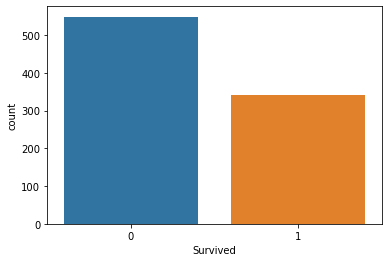

In [41]:
sns.countplot(df.Survived)
plt.show()

Not many passenger survived the titanic.

Lets look at some features maybe related to survival

<AxesSubplot:xlabel='Survived', ylabel='count'>

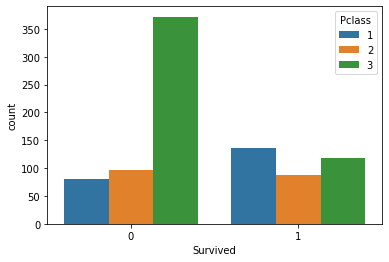

In [42]:
sns.countplot(x="Survived",hue='Pclass',data=df)

From above we can understand that Passenger from P class 1 has more chance of survival

<AxesSubplot:xlabel='Survived', ylabel='count'>

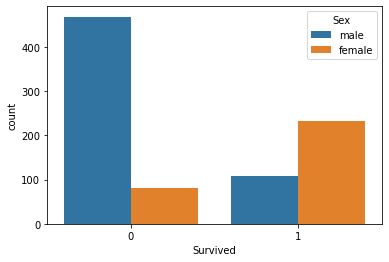

In [43]:
sns.countplot(x="Survived",hue='Sex',data=df)

As compared to male, Female has more chance of survival

<AxesSubplot:xlabel='Survived', ylabel='count'>

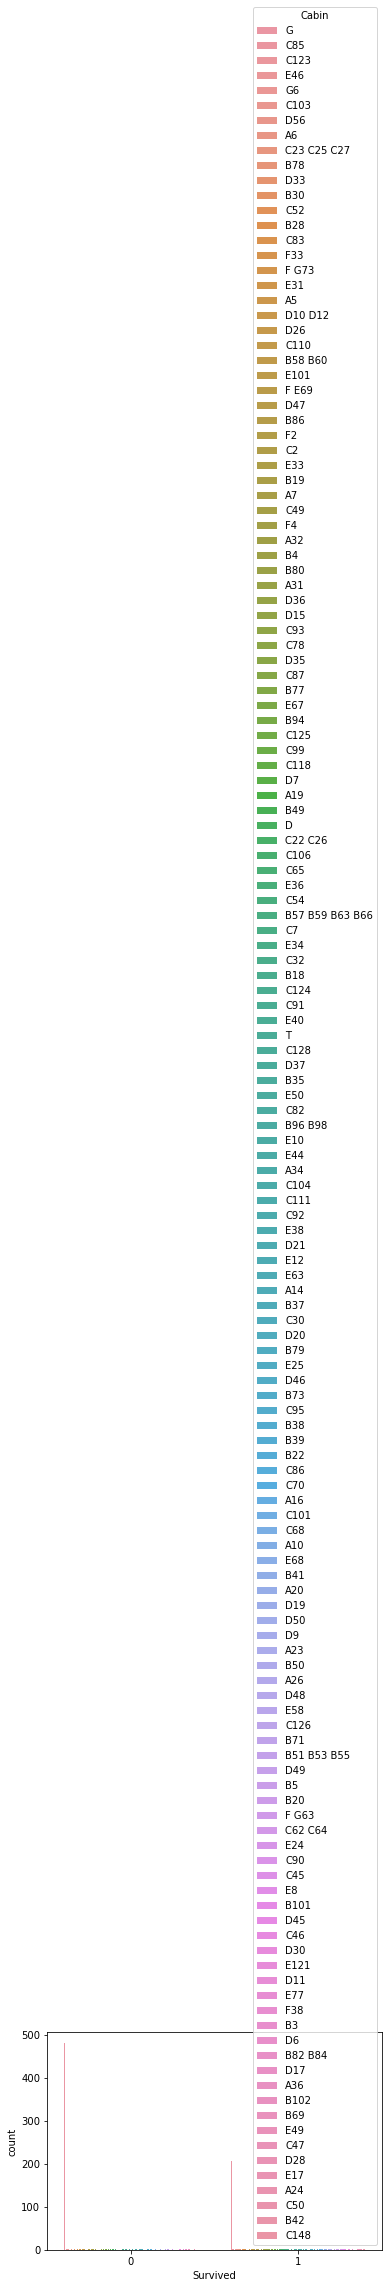

In [44]:
sns.countplot(x="Survived",hue='Cabin',data=df)

Passenger in cabin G and C were badly affected.

<AxesSubplot:xlabel='Survived', ylabel='count'>

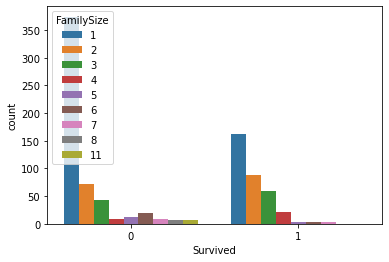

In [45]:
sns.countplot(x="Survived",hue='FamilySize',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

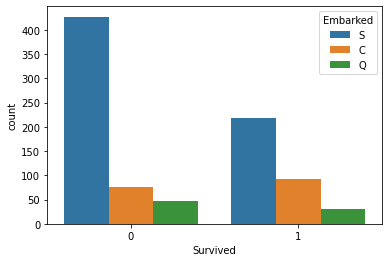

In [46]:
sns.countplot(x="Survived",hue='Embarked',data=df)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

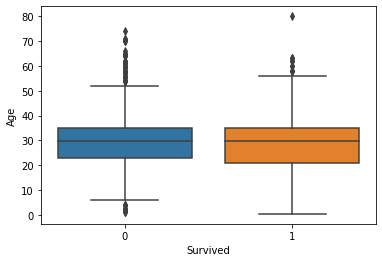

In [47]:
sns.boxplot(x='Survived', y='Age', data=df)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

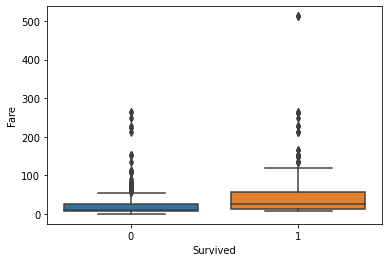

In [48]:
sns.boxplot(x='Survived', y='Fare', data=df)

Passenger who paid the higher fare are more likely to survive the wreck.

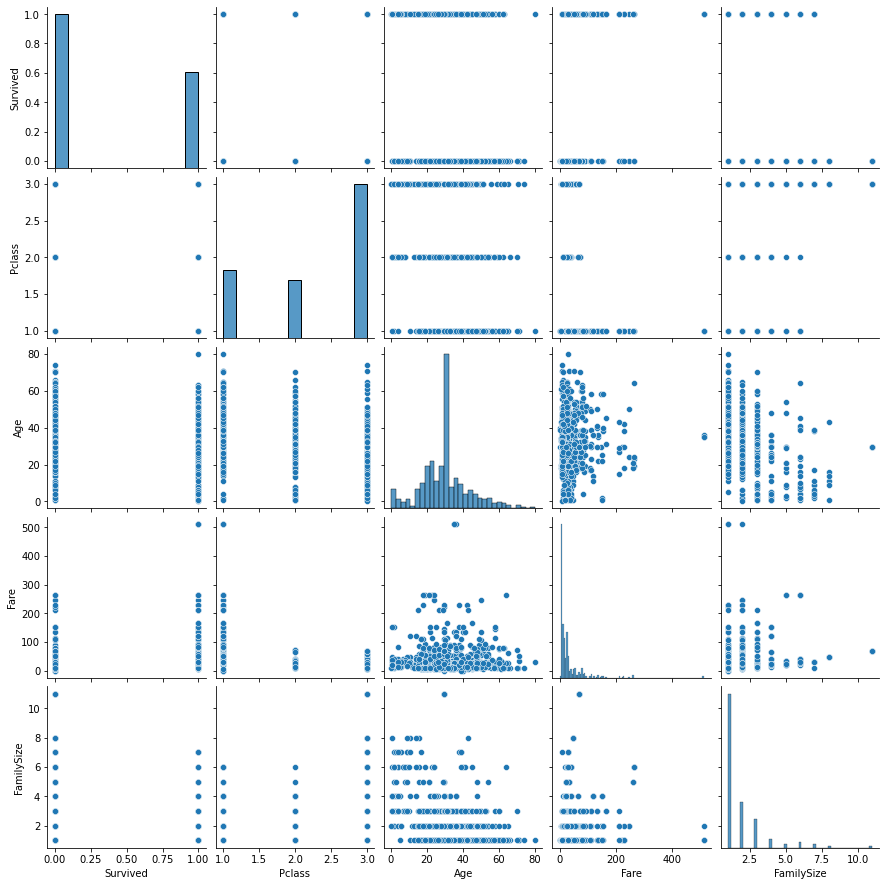

In [49]:
sns.pairplot(df)

There is not much relation we can found from pairplot. Lets see if heatmap can throw anything.

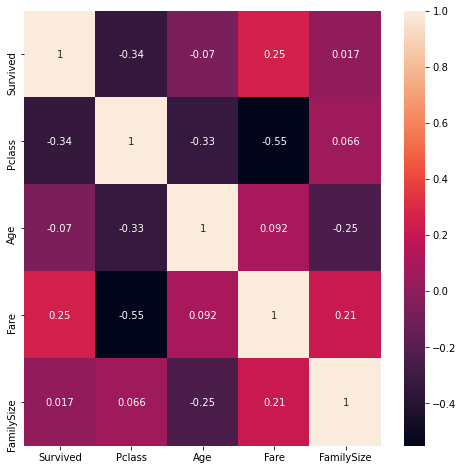

In [50]:
corr_hmap=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Survived is most co related with P class and Fare.

Passenger with Pclass 1 and who paid the highest fare surived the wreck.

In [51]:
df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,0,3,male,22.000000,7.2500,G,S,2
1,1,1,female,38.000000,71.2833,C85,C,2
2,1,3,female,26.000000,7.9250,G,S,1
3,1,1,female,35.000000,53.1000,C123,S,2
4,0,3,male,35.000000,8.0500,G,S,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,G,S,1
887,1,1,female,19.000000,30.0000,B42,S,1
888,0,3,female,29.699118,23.4500,G,S,4
889,1,1,male,26.000000,30.0000,C148,C,1


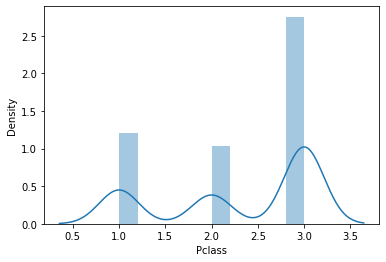

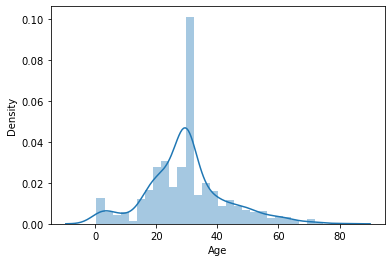

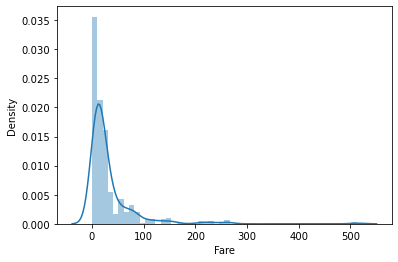

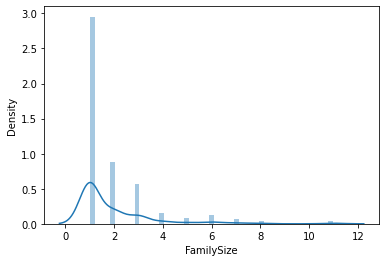

In [52]:
columns=['Pclass','Age','Fare','FamilySize']

for i in columns:
    sns.distplot(df[i])
    plt.show()

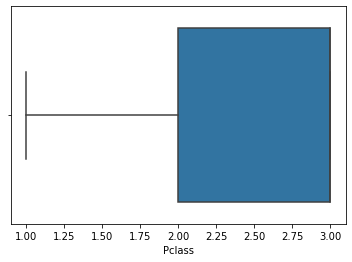

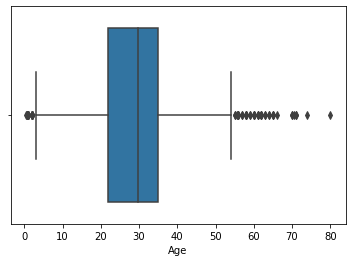

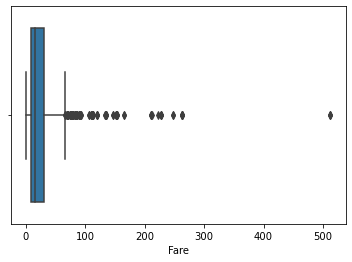

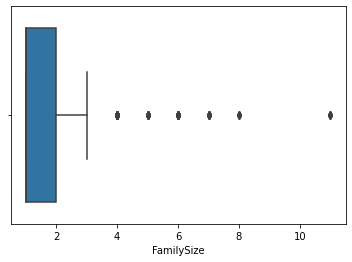

In [53]:
for i in columns:
    sns.boxplot(df[i])
    plt.show()

In [54]:
df[df["Fare"] > 300]

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
258,1,1,female,35.0,512.3292,G,C,1
679,1,1,male,36.0,512.3292,B51 B53 B55,C,2
737,1,1,male,35.0,512.3292,B101,C,1


We can see that after fare 263 there is huge gap and next highest is 512.32. We can correct that by changing the values to 263


In [55]:
df.loc[(df["Embarked"] == 'C' )& (df['Fare']==512.3292), 'Fare']=263

In [56]:
df[df["Fare"] > 260]

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
27,0,1,male,19.0,263.000,C23 C25 C27,S,6
88,1,1,female,23.0,263.000,C23 C25 C27,S,6
258,1,1,female,35.0,263.000,G,C,1
311,1,1,female,18.0,262.375,B57 B59 B63 B66,C,5
341,1,1,female,24.0,263.000,C23 C25 C27,S,6
438,0,1,male,64.0,263.000,C23 C25 C27,S,6
679,1,1,male,36.0,263.000,B51 B53 B55,C,2
737,1,1,male,35.0,263.000,B101,C,1
742,1,1,female,21.0,262.375,B57 B59 B63 B66,C,5


We have successfully removed the outliers from the Fare column

Lets check for skewness

In [57]:
df.skew()

Survived      0.478523
Pclass       -0.630548
Age           0.434488
Fare          3.225942
FamilySize    2.727441
dtype: float64

We will apply power transformation method to remove the skewness

In [58]:
from sklearn.preprocessing import power_transform

Power transform will not worked on categrical data. Hence we will seperate the categorical data then will run only on the numberical data.

To proceed further lets make the copy first

In [59]:
df_new=df.copy()

In [60]:
df_new

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,0,3,male,22.000000,7.2500,G,S,2
1,1,1,female,38.000000,71.2833,C85,C,2
2,1,3,female,26.000000,7.9250,G,S,1
3,1,1,female,35.000000,53.1000,C123,S,2
4,0,3,male,35.000000,8.0500,G,S,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,G,S,1
887,1,1,female,19.000000,30.0000,B42,S,1
888,0,3,female,29.699118,23.4500,G,S,4
889,1,1,male,26.000000,30.0000,C148,C,1


Now we will drop the columns where we will not run the power transform

In [61]:
df.drop(['Survived','Age'],axis=1,inplace=True)

In [62]:
df.drop(['Sex','Cabin','Embarked'],axis=1,inplace=True)

Applying power transform and creating the new DataFrame df2



In [63]:
df2=power_transform(df)

In [64]:
df2=pd.DataFrame(data=df2,columns=df.columns)

In [65]:
df2

,Pclass,Fare,FamilySize
0,0.863973,-1.060840,0.836696
1,-1.459129,1.386472,0.836696
2,0.863973,-0.942748,-0.791007
3,-1.459129,1.141594,0.836696
4,0.863973,-0.922142,-0.791007
...,...,...,...
886,-0.592604,-0.316118,-0.791007
887,-1.459129,0.609213,-0.791007
888,0.863973,0.354858,1.558215
889,-1.459129,0.609213,-0.791007


In [66]:
df2.skew()

Pclass       -0.441438
Fare         -0.059900
FamilySize    0.576605
dtype: float64

Skewness is removed, now lets add the column back from the copy we have created

In [67]:
df2['Survived']=df_new['Survived']
df2['Age']=df_new['Age']
df2['Sex']=df_new['Sex']
df2['Cabin']=df_new['Cabin']
df2['Embarked']=df_new['Embarked']

In [68]:
df2

,Pclass,Fare,FamilySize,Survived,Age,Sex,Cabin,Embarked
0,0.863973,-1.060840,0.836696,0,22.000000,male,G,S
1,-1.459129,1.386472,0.836696,1,38.000000,female,C85,C
2,0.863973,-0.942748,-0.791007,1,26.000000,female,G,S
3,-1.459129,1.141594,0.836696,1,35.000000,female,C123,S
4,0.863973,-0.922142,-0.791007,0,35.000000,male,G,S
...,...,...,...,...,...,...,...,...
886,-0.592604,-0.316118,-0.791007,0,27.000000,male,G,S
887,-1.459129,0.609213,-0.791007,1,19.000000,female,B42,S
888,0.863973,0.354858,1.558215,0,29.699118,female,G,S
889,-1.459129,0.609213,-0.791007,1,26.000000,male,C148,C


In [69]:
df2.skew()

Pclass       -0.441438
Fare         -0.059900
FamilySize    0.576605
Survived      0.478523
Age           0.434488
dtype: float64

Lets create the instance for Object data type. We will use the same for changing the categorical data to numerical.


In [70]:
Object=['Sex','Cabin','Embarked']

#We will use LabelEncoder to change the data type

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in Object:
    df2[i]=le.fit_transform(df2[i])

In [71]:
df2

,Pclass,Fare,FamilySize,Survived,Age,Sex,Cabin,Embarked
0,0.863973,-1.060840,0.836696,0,22.000000,1,145,2
1,-1.459129,1.386472,0.836696,1,38.000000,0,81,0
2,0.863973,-0.942748,-0.791007,1,26.000000,0,145,2
3,-1.459129,1.141594,0.836696,1,35.000000,0,55,2
4,0.863973,-0.922142,-0.791007,0,35.000000,1,145,2
...,...,...,...,...,...,...,...,...
886,-0.592604,-0.316118,-0.791007,0,27.000000,1,145,2
887,-1.459129,0.609213,-0.791007,1,19.000000,0,30,2
888,0.863973,0.354858,1.558215,0,29.699118,0,145,2
889,-1.459129,0.609213,-0.791007,1,26.000000,1,60,0


Splitting our training data into input and out variable

In [72]:
df_x=df2.drop(columns='Survived')
y=df2['Survived']

In [73]:
df_x

,Pclass,Fare,FamilySize,Age,Sex,Cabin,Embarked
0,0.863973,-1.060840,0.836696,22.000000,1,145,2
1,-1.459129,1.386472,0.836696,38.000000,0,81,0
2,0.863973,-0.942748,-0.791007,26.000000,0,145,2
3,-1.459129,1.141594,0.836696,35.000000,0,55,2
4,0.863973,-0.922142,-0.791007,35.000000,1,145,2
...,...,...,...,...,...,...,...
886,-0.592604,-0.316118,-0.791007,27.000000,1,145,2
887,-1.459129,0.609213,-0.791007,19.000000,0,30,2
888,0.863973,0.354858,1.558215,29.699118,0,145,2
889,-1.459129,0.609213,-0.791007,26.000000,1,60,0


Now we will standardize our data.

We wil be using StandardScaler for the same.

Lets import the required library

In [74]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(df_x)

In [75]:
x=sc_x
x=pd.DataFrame(x,columns=df_x.columns)

In [76]:

x

,Pclass,Fare,FamilySize,Age,Sex,Cabin,Embarked
0,0.863973,-1.060840,0.836696,-0.592481,0.737695,0.447205,0.585954
1,-1.459129,1.386472,0.836696,0.638789,-1.355574,-1.365133,-1.942303
2,0.863973,-0.942748,-0.791007,-0.284663,-1.355574,0.447205,0.585954
3,-1.459129,1.141594,0.836696,0.407926,-1.355574,-2.101395,0.585954
4,0.863973,-0.922142,-0.791007,0.407926,0.737695,0.447205,0.585954
...,...,...,...,...,...,...,...
886,-0.592604,-0.316118,-0.791007,-0.207709,0.737695,0.447205,0.585954
887,-1.459129,0.609213,-0.791007,-0.823344,-1.355574,-2.809339,0.585954
888,0.863973,0.354858,1.558215,0.000000,-1.355574,0.447205,0.585954
889,-1.459129,0.609213,-0.791007,-0.284663,0.737695,-1.959806,-1.942303


Now we will move forward for model fitting

## Model Fitting and Selection¶

We will check the best possible random state to train our model. Using LogisticRegression to check and then later will run with other models


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [78]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.8432835820895522  on Random state 78


We can see that the best random state is 78. We will split the data with this random state



In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=78)


We will train and test the data using different classification Model



In [80]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dt=DecisionTreeClassifier()
gnb=GaussianNB()
ad=AdaBoostClassifier(n_estimators=100)

In [81]:
model=(lg,sv,knn,rfc,dt,gnb,ad)
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('-------------------------------------------------------------------------------------------')

Accuracy score of LogisticRegression()
0.8432835820895522
[[143  23]
 [ 19  83]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       166
           1       0.78      0.81      0.80       102

    accuracy                           0.84       268
   macro avg       0.83      0.84      0.84       268
weighted avg       0.84      0.84      0.84       268

-------------------------------------------------------------------------------------------
Accuracy score of SVC(probability=True)
0.8395522388059702
[[153  13]
 [ 30  72]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       166
           1       0.85      0.71      0.77       102

    accuracy                           0.84       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.84      0.84       268

-------------------------------------------------------------------------------------------

We have got the score for all the above models. Logistic regression has given us the best accuracy

## Cross Validation¶


In [82]:
from sklearn.model_selection import cross_val_score

for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of', m)
    print(score.mean())
    print('-------------------------------------------------------------------------------')

Mean Accuracy of LogisticRegression()
0.7901198920343983
-------------------------------------------------------------------------------
Mean Accuracy of SVC(probability=True)
0.8092147385600402
-------------------------------------------------------------------------------
Mean Accuracy of KNeighborsClassifier()
0.8114995919904588
-------------------------------------------------------------------------------
Mean Accuracy of RandomForestClassifier()
0.8182097796748478
-------------------------------------------------------------------------------
Mean Accuracy of DecisionTreeClassifier()
0.77558847529973
-------------------------------------------------------------------------------
Mean Accuracy of GaussianNB()
0.748672399723809
-------------------------------------------------------------------------------
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.8092586780490867
-------------------------------------------------------------------------------


RFC has given us the least score difference between test accuracy and Cross validation followed by KNN.

We will check the ROC_AUC score to pick the final model

# ROC_AUC score

AUC Score of LogisticRegression()
0.8375856366643043




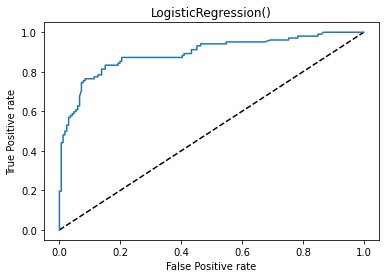



------------------------------------------------------------------------
AUC Score of SVC(probability=True)
0.8137845499645643




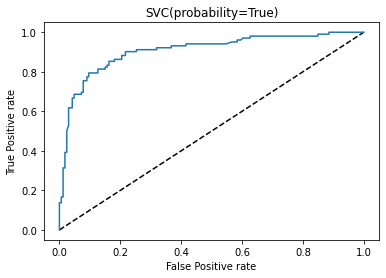



------------------------------------------------------------------------
AUC Score of KNeighborsClassifier()
0.8070517363571934




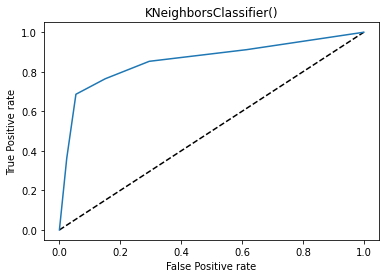



------------------------------------------------------------------------
AUC Score of RandomForestClassifier()
0.8424875974486181




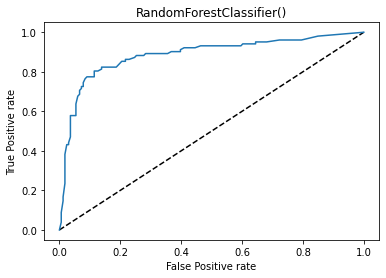



------------------------------------------------------------------------
AUC Score of DecisionTreeClassifier()
0.7826009922041106




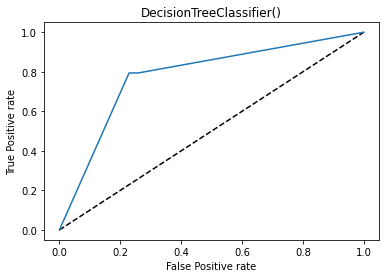



------------------------------------------------------------------------
AUC Score of GaussianNB()
0.7471651311126861




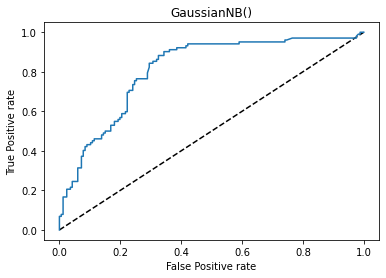



------------------------------------------------------------------------
AUC Score of AdaBoostClassifier(n_estimators=100)
0.8293172690763053




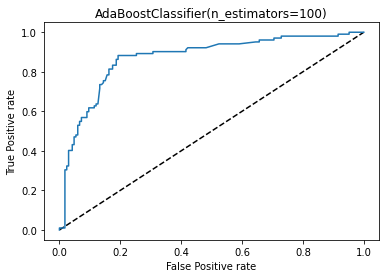



------------------------------------------------------------------------


In [83]:
from sklearn.metrics import roc_curve,roc_auc_score

for m in model:
    y_pred_prob=m.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    print('AUC Score of', m)
    print(auc_score)
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(m)
    plt.show()
    print('\n')
    print('------------------------------------------------------------------------')

We will now compare all our metrics score to determine the best fitting model

In [84]:
Performance={'Model':['LogisticRegression','SVC','KNN','RFC','DTC','GNB','ADC'],
            'Test_Accuracy':[84,82,81,81,78,78,82],
            'Cross_val_score':[79,80,81,81,77,74,80],
            'Diffeerence':[84-79,82-80,81-81,81-81,78-77,78-74,82-80],
            'ROC_AUC_score':[82,76,78,80,77,77,80]}

In [85]:
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Test_Accuracy,Cross_val_score,Diffeerence,ROC_AUC_score
0,LogisticRegression,84,79,5,82
1,SVC,82,80,2,76
2,KNN,81,81,0,78
3,RFC,81,81,0,80
4,DTC,78,77,1,77
5,GNB,78,74,4,77
6,ADC,82,80,2,80


###### After checking the above metrics we can confirm that RandomForest Classifier has performed well with Test accuracy of 81%, Croass val score of 81% as well and ROC_AUC score of 80%
We will select RFC and move forward for hypertuning the model

##### HyperTuning


In [86]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,250,500],'criterion':['gini','entropy'],'max_depth':np.arange(2,10)}

In [87]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)

Fitting our best model for HyperTuning

In [88]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [100, 250, 500]})

Lets check the best parameters to fit the model

In [89]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 100}

Fitting our model with the above parameters

In [90]:
Finalmod=RandomForestClassifier(criterion='gini', max_depth= 6, n_estimators= 250)
Finalmod.fit(x_train,y_train)
pred=Finalmod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

83.5820895522388


In [91]:
import joblib
joblib.dump(Finalmod,'titanic_model.obj')

['titanic_model.obj']